In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from scipy.ndimage import median_filter
def auto_mask(image, size=2, thershold=5):

    blur_image = median_filter(image, size)
    diff_image = image - blur_image
    thershold_value = thershold*np.std(diff_image)

    dead_pixels = np.nonzero((np.abs(diff_image[20: -20, 20: -20])) > thershold_value)
    dead_pixels = np.array(dead_pixels) + 20

    for i, j in zip(dead_pixels[0], dead_pixels[1]):
        image[i, j] = blur_image[i, j]
    return image

In [10]:
data_dir = "/Volumes/Data/BeamLines/CHX/Luxi_description_files_for_duke/duke_cc_12C/"
duke_ndata = np.load(data_dir+"duke_img_1_5000.npy")
duke_dark = np.load(data_dir+"duke_dark.npy")

duke_data = []
for i in range(duke_ndata.shape[0]):
    duke_data.append(duke_ndata[i] - duke_dark)
    
duke_data=np.asarray(duke_data)

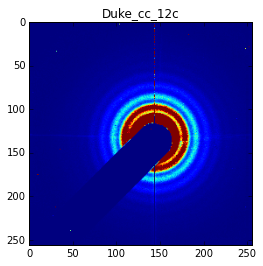

In [11]:
sum_img = np.average(duke_data, axis=0)
plt.imshow(sum_img, vmax=1e0)
plt.title("Duke_cc_12c")
plt.show()

In [25]:
auto_img=auto_mask(sum_img, size =100, thershold=2)

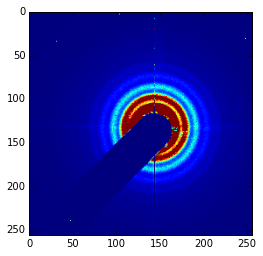

In [26]:
plt.imshow(auto_img, vmax=1e0)
plt.show()

In [62]:
blur_image = median_filter(sum_img, size=100)

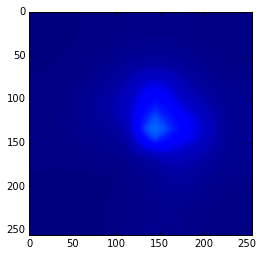

In [63]:
plt.imshow(blur_image, vmax=1e0)

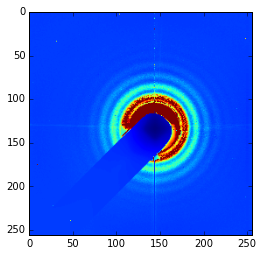

In [64]:
diff_image = sum_img - blur_image
plt.imshow(diff_image, vmax=1e0)

In [65]:
2*np.std(diff_image)


516.39645944068764

In [66]:
6*np.std(blur_image)

0.1982537381986626

In [75]:
np.abs(diff_image[1: -1, 1: -1])

array([[ 0.0008,  0.001 ,  0.0016, ...,  0.0012,  0.0012,  0.0002],
       [ 0.0006,  0.0004,  0.0012, ...,  0.0006,  0.0012,  0.0006],
       [ 0.0006,  0.0014,  0.0004, ...,  0.0022,  0.001 ,  0.002 ],
       ..., 
       [ 0.0002,  0.0002,  0.0002, ...,  0.0002,  0.0004,  0.0008],
       [ 0.0002,  0.0002,  0.0002, ...,  0.0008,  0.0002,  0.0022],
       [ 0.0002,  0.0002,  0.    , ...,  0.0004,  0.0028,  0.0016]])

In [99]:
dead_pixels = np.nonzero(np.abs(diff_image) > 20*np.std(diff_image))

In [100]:
dead_pixels

(array([0, 0]), array([143, 156]))

In [101]:
sum1 = sum_img
for i, j in zip(dead_pixels[0], dead_pixels[1]):
        sum1[i, j] = blur_image[i, j]


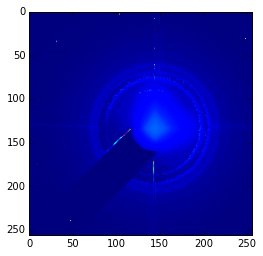

In [102]:
plt.imshow(sum1, vmax=1e0)

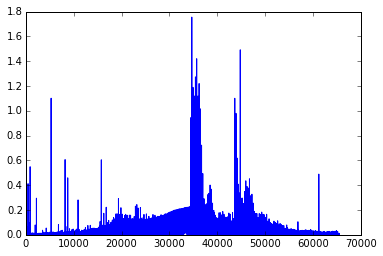

In [109]:
plt.plot(np.ravel(sum_img))

In [108]:
import skimage

In [89]:
from skimage import filter, data

In [91]:
camera = data.camera()
camera_equalized = filter.hsobel(camera)

/Users/sameera/mc/envs/work/lib/python2.7/site-packages/skimage/filters/edges.py:173: skimage_deprecation: Call to deprecated function ``hsobel``. Use ``skimage.filters.sobel_h`` instead.
  def hsobel(image, mask=None):


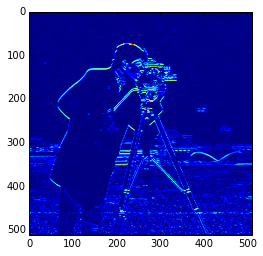

In [92]:
plt.imshow(camera_equalized)

/Users/sameera/mc/envs/work/lib/python2.7/site-packages/skimage/filters/edges.py:173: skimage_deprecation: Call to deprecated function ``hsobel``. Use ``skimage.filters.sobel_h`` instead.
  def hsobel(image, mask=None):


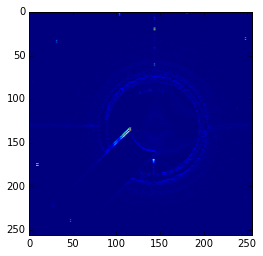

In [93]:
ty=filter.hsobel(sum_img)
plt.imshow(ty, vmax=1e0)

In [106]:
np.mean(sum_img)

0.026706271362304686